In [278]:
#-*-coding:utf-8-*-
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import tensorflow as tf

from datetime import timedelta
import autokeras as ak
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

#만든 모듈을 불러옴
import sys
from importlib import reload
sys.path.append('Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/') 
print(sys.path)
import Timeseries_module_ykkim as tsm

['C:\\Users\\KIMYEONKYOUNG\\Desktop\\2021 AI 빅데이터팀\\메탈 수요예측\\code', 'C:\\ProgramData\\Anaconda3\\python38.zip', 'C:\\ProgramData\\Anaconda3\\DLLs', 'C:\\ProgramData\\Anaconda3\\lib', 'C:\\ProgramData\\Anaconda3', '', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\KIMYEONKYOUNG\\.ipython', 'Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/', 'Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/', 'Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/', 'Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/', 'Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/', 'Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/', 'Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/', 'Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/', 'Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/']


<ipython-input-278-77fdc354aa4a>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [243]:
data=pd.read_excel('C:/Users/KIMYEONKYOUNG/Desktop/2021 AI 빅데이터팀/메탈 수요예측/data/RawData_v1.3.xlsx')

In [244]:
column='RS1'
dd = tsm.ts_data(data,column)

In [279]:
# standard scaler
# scal = StandardScaler()
# scal =MinMaxScaler()
scal = RobustScaler()
dd_t = scal.fit_transform(dd)
dd_t=pd.DataFrame(dd_t,index=dd.index)

# train,test split(cv)

In [18]:
# train,test_nu=tsm.TS_holdout(dd,5)  # train : 2016~2020.10

In [19]:
# train_nu,test=tsm.TS_holdout(dd,10)  # test : 5개월

In [96]:
print(train.index.min(), '~',train.index.max() )

2016-01-01 00:00:00 ~ 2020-10-01 00:00:00


In [280]:
test_cutoff_date= dd_t.index.max() - timedelta(days=5*28) # test : 5개월
val_cutoff_date=dd_t.index.max() - timedelta(days=20*30) # validation : 10개월

In [281]:
df_test = dd_t[dd_t.index >=  '2020-06-01']
df_val = dd_t[(dd_t.index > val_cutoff_date) & (dd_t.index <= test_cutoff_date)]
df_train = dd_t[(dd_t.index <= val_cutoff_date)   ]

# data preprocessing

In [182]:
# # standard scaler
# scal = StandardScaler()
# df_train_t = scal.fit_transform(df_train)
# scal.partial_fit(df_val)
# df_val_t=scal.transform(df_val)

In [282]:
# dateaframe to tensor
nd=np.asarray(df_train)
ndd=nd.reshape(len(df_train),)

nv=np.asarray(df_val)
nvv=nv.reshape(len(df_val),)

In [283]:
n_steps = 5
(train_x, train_y) = tsm.split_sequence(ndd, n_steps) 
print(train_x.shape) 
print(train_y.shape)
# from keras.preprocessing.sequence import TimeseriesGenerator
# generator = TimeseriesGenerator(train, targets=train, length=5, batch_size=1)
# generator
# train_x

(38, 5)
(38,)


In [284]:
(val_x, val_y) = tsm.split_sequence(nvv, n_steps) 
print(val_x.shape) 
print(val_y.shape)

(10, 5)
(10,)


In [287]:
n_features = 1 
train_x = train_x.reshape(train_x.shape[0], n_steps, n_features)
val_x = val_x.reshape(val_x.shape[0], n_steps, n_features)

print(train_x.shape)
print(val_x.shape) 

(38, 5, 1)
(10, 5, 1)


In [189]:
#########timesplit 

In [24]:
# from sklearn.model_selection import TimeSeriesSplit
# tscv=TimeSeriesSplit(n_splits=5) #, test_size=1
# print(tscv)

TimeSeriesSplit(max_train_size=None, n_splits=5)


In [79]:
# for train_index, test_index in tscv.split(x):
#         print("TRAIN:", train_index, "TEST:", test_index)
#         X_train, X_test = x[train_index], x[test_index]
#         y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13 14 15 16 17 18 19 20 21]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] TEST: [22 23 24 25 26 27 28 29 30]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] TEST: [31 32 33 34 35 36 37 38 39]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47 48]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48] TEST: [49 50 51 52 53 54 55 56 57]


In [77]:
# from sklearn.model_selection import TimeSeriesSplit
# tscv = TimeSeriesSplit(n_splits=5)
# i = 1
# score = []
# for tr_index, val_index in tscv.split(X_train):
#     X_tr, X_val = X_train[tr_index], X_train[val_index]
#     y_tr, y_val = y_train[tr_index], y_train[val_index]
#     for mf in np.linspace(100, 150, 6):
#         for ne in np.linspace(50, 100, 6):
#             for md in np.linspace(20, 40, 5):
#                 for msl in np.linspace(30, 100, 8):
#                     rfr = RandomForestRegressor(
#                         max_features=int(mf),
#                         n_estimators=int(ne),
#                         max_depth=int(md),
#                         min_samples_leaf=int(msl))
#                     rfr.fit(X_tr, y_tr)
#                     score.append([i,
#                                   mf, 
#                                   ne,
#                                   md, 
#                                   msl, 
#                                   rfr.score(X_val, y_val)])
#     i += 1

NameError: name 'RandomForestRegressor' is not defined

In [288]:
# train(train,val)
# Hyperparameter Setting
BATCH_SIZE = 1
BUFFER_SIZE=100

# # Dataset -> Tensor
train_univariate = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((val_x, val_y))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

# LSTM model(univariate, simple)_train

In [289]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.models import load_model

In [290]:
path_checkpoint = "lstm_model_checkpoint_try4.h5"
es_callback = tf.keras.callbacks.EarlyStopping(monitor="loss", min_delta=0, patience=100, mode='auto')# mode=auto loss면 최저값100번정도 반복되면 정지, acc면 최고값이 100번정도 반복되면 정지

modelckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    monitor="loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,)

In [291]:
# Build Simple LSTM Model
simple_lstm_model = tf.keras.models.Sequential([
#     tf.keras.layers.LSTM(10, activation = 'relu', input_shape=(n_steps,1),return_sequences=True),#
    tf.keras.layers.LSTM(10, activation = 'relu', input_shape=(n_steps,1)), 
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5),   
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mse',metrics=['mse'])


In [292]:
# Train the Model(val)
EVALUATION_INTERVAL = 30
EPOCHS = 300

history=simple_lstm_model.fit(train_univariate , epochs=EPOCHS,validation_data=val_univariate,steps_per_epoch=EVALUATION_INTERVAL,validation_steps=1,verbose=1,callbacks=[es_callback, modelckpt_callback])

Epoch 1/300
30/30 [==============================] - 4s 19ms/step - loss: 0.4038 - mse: 0.4038 - val_loss: 0.0765 - val_mse: 0.0765

Epoch 00001: loss improved from inf to 0.36917, saving model to lstm_model_checkpoint_try4.h5
Epoch 2/300
30/30 [==============================] - 0s 7ms/step - loss: 0.3478 - mse: 0.3478 - val_loss: 0.0910 - val_mse: 0.0910

Epoch 00002: loss did not improve from 0.36917
Epoch 3/300
30/30 [==============================] - 0s 5ms/step - loss: 0.2874 - mse: 0.2874 - val_loss: 0.0938 - val_mse: 0.0938

Epoch 00003: loss improved from 0.36917 to 0.30035, saving model to lstm_model_checkpoint_try4.h5
Epoch 4/300
30/30 [==============================] - 0s 5ms/step - loss: 0.4365 - mse: 0.4365 - val_loss: 0.1007 - val_mse: 0.1007

Epoch 00004: loss did not improve from 0.30035
Epoch 5/300
30/30 [==============================] - 0s 6ms/step - loss: 0.1863 - mse: 0.1863 - val_loss: 0.1112 - val_mse: 0.1112

Epoch 00005: loss improved from 0.30035 to 0.28535, s

In [293]:
simple_lstm_model.save('C:/Users/KIMYEONKYOUNG/Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/lstm_model_checkpoint_robustscale.h5')

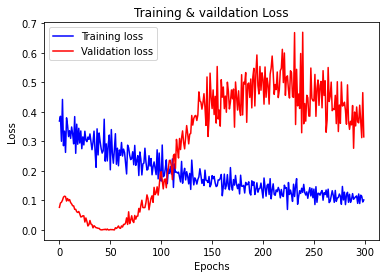

In [294]:
tsm.visualize_loss(history, "Training & vaildation Loss")

 # predict

In [295]:
model = load_model('C:/Users/KIMYEONKYOUNG/Desktop/2021 AI 빅데이터팀/메탈 수요예측/code/lstm_model_checkpoint_robustscale.h5')

In [296]:
ndt=np.asarray(df_test)
nddt=ndt.reshape(len(df_test),)

In [297]:
(xt, yt) = split_sequence(nddt, n_steps)

In [298]:
xtt = xt.reshape(xt.shape[0], n_steps, n_features)

In [300]:
yhat = model.predict(xtt)
prediction=pd.DataFrame(yhat)
prediction.columns=['yhat']
prediction.index=test[5:].index

In [224]:
# scal
# print(scal.n_samples_seen_,scal.data_min_, scal.data_max_, scal.feature_range)

63 [54.973] [170.292] (0, 1)


In [301]:
# prediction['prediction']=scal.inverse_transform(prediction['yhat']) # standard
# minmax
# yh=scal.transform(prediction['yhat'])
prediction['prediction']=scal.inverse_transform(prediction)

In [302]:
prediction

,yhat,prediction
Time,,
2020-11-01,-0.703848,100.811218
2020-12-01,0.050655,126.463188
2021-01-01,-0.435937,109.919807
2021-02-01,-1.365543,78.314575
2021-03-01,3.021021,227.451187


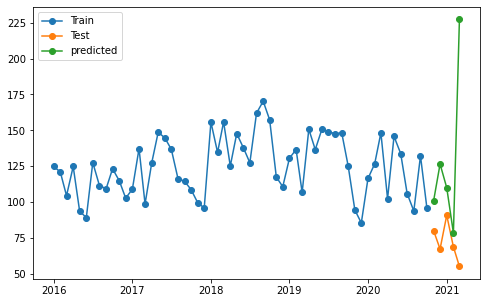

In [303]:
#graph
tsm.predict_graph(train,test_nu,prediction['prediction'])

In [304]:
output=pd.merge(test[5:],prediction['prediction'],left_index=True, right_index=True)
output

,RS1,prediction
Time,,
2020-11-01,79.923,100.811218
2020-12-01,67.150,126.463188
2021-01-01,90.721,109.919807
2021-02-01,68.630,78.314575
2021-03-01,54.973,227.451187


# metric(평가)

In [305]:
# MSE,RMSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(output['prediction'],output[column])
rmse=np.sqrt(mean_squared_error(output['prediction'],output[column]))
print('MSE (%s)'%mse)
print('RMSE (%s)'%rmse)

MSE (6833.096438753302)
RMSE (82.66254556177968)


# Plan, Predict 비교

In [306]:
plan=tsm.ts_data(data,'MS1')

In [307]:
compare=pd.merge(output,plan,left_index=True, right_index=True)

In [308]:
compare['pred_diff']=abs(compare['RS1']-compare['prediction'])
compare['plan_diff']=abs(compare['RS1']-compare['MS1'])

In [309]:
compare

,RS1,prediction,MS1,pred_diff,plan_diff
Time,,,,,
2020-11-01,79.923,100.811218,76.0000,20.888218,3.9230
2020-12-01,67.150,126.463188,55.0000,59.313188,12.1500
2021-01-01,90.721,109.919807,90.5325,19.198807,0.1885
2021-02-01,68.630,78.314575,78.5325,9.684575,9.9025
2021-03-01,54.973,227.451187,55.7140,172.478187,0.7410
